In [1]:
import warnings
warnings.simplefilter("ignore")

#  Práctica 3.<font color='#CD5C5C'>  Sensado Inercial    </font>
## Evaluación de Rutina de Ejercicio 

####  <font color='#F5BCA9 '> Realizado por: Ixchel Dafne Avendaño Pacheco  </font>

#### Matricula: 23265456

#  <font color='#F5BCA9 '> Preparación  </font> de <font color='#CD5C5C '> Datos </font> 


Como paso inicial, se realizó una reestructuración de la información para facilitar su análisis. Adicionalmente, se incorporaron dos nuevas columnas: una para las repeticiones y otra para las clases.

Los datos se segmentaron manualmente en cinco conjuntos, uno por cada repetición (Repetición 1, Repetición 2, Repetición 3, Repetición 4 y Repetición 5), tomando como referencia los videos grabados durante la adquisición de los mismos.

La clasificación se llevó a cabo utilizando la información proporcionada por el M. C. Esteban, basándose en las repeticiones como criterio principal.

Metodología:

Segmentación: Se realizó de forma manual, revisando los videos grabados durante la adquisición de datos.
Clasificación: Se basó en la información proporcionada por el M. C. Esteban, utilizando las repeticiones como criterio principal.


#  <font color='#F5BCA9 '> Construcción  </font> de <font color='#CD5C5C '> DataFrame </font> 


Convertimos los archivos .csv en dataframes 

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("Datas/Andrea.csv")
df2 = pd.read_csv("Datas/Andres.csv")
df3 = pd.read_csv("Datas/Ariana.csv")
df4 = pd.read_csv("Datas/Arturo.csv")
df5 = pd.read_csv("Datas/Cristian.csv")
df6 = pd.read_csv("Datas/Juan.csv")
df7 = pd.read_csv("Datas/Leydy.csv")
df8 = pd.read_csv("Datas/Rachel.csv")
df9 = pd.read_csv("Datas/Scarlett.csv")

Unimos todos los DataFrame.

Se realizó de esta forma ya que al unirlos todos se tenía un problema al concatenar las clases

In [4]:
dfa = pd.concat([df1, df2, df3, df4, df5,  df7, df8], ignore_index=True)
dfa = dfa.rename(columns={'Clase': 'Clase1'})
#dfa.info()

Unimos los archiso 6 y 9 que son los que están generando problema. El problema que se resenta es que al momento de unirse se genera una nueva columna que corresponde a clase, en esta nueva columna solo aparecen los valores de las clases, pero generando una doble columna de clase 


In [5]:
dfb = pd.concat([df6, df9], ignore_index=True)
#dfb.info()


Unimos los dos dataframe a y b que contienen 6 y 2 de todos los archivos respectivamente 

In [6]:
df = pd.concat([dfa, dfb], ignore_index=True)
#df.info()

Completamos la información que se ha perdido y se ha sobrescrito en la segnda columna clase. La información completa la almacenamos en una nueva columna llamada Clase 

In [7]:
df["Clase"] = df["Clase1"].fillna(df["Clase2"])
#df.info()

Eliminamos las dos columnas extas que se tienen de Clase, ya que estan poseen información incompleta 

In [8]:
df = df.drop("Clase1", axis=1)
df = df.drop("Clase2", axis=1)
#Imprimimos una vez más la información del dataframe para cerciorarse que se ha almacenado toda la información correctamente
#df.info()

Una vez que se tiene el dataframe con toda la información s procede a eliminar las columnas que no son relevantes o que no contienen información 

In [9]:
df = df.drop([' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'],axis = 1)
#df.info()

Guardamos el nuevo dataframe en un .csv


In [10]:
df.to_csv("data_completo.csv")

#  <font color='#F5BCA9 '> Selección </font> de <font color='#CD5C5C '> Características </font> 


In [11]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np

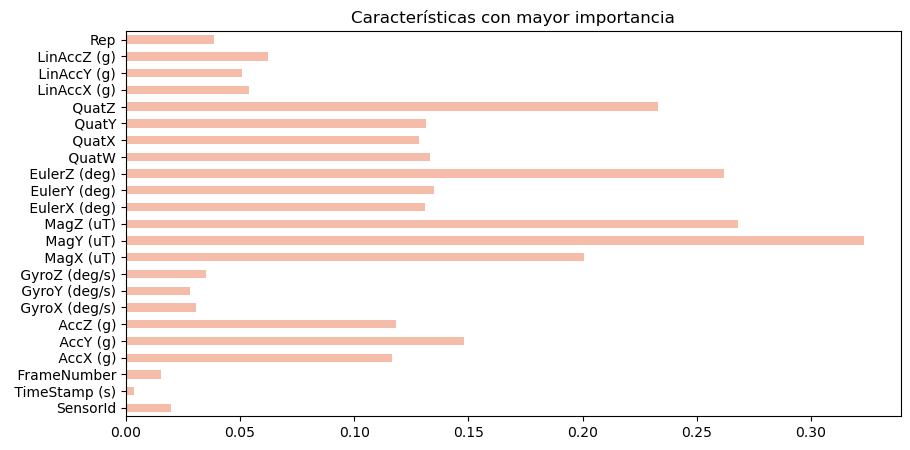

In [12]:
x_nueva = mutual_info_classif(df.iloc[:,0:-1], df.iloc[:,-1])
feat_imp = pd.Series(x_nueva, df.columns[0:len(df.columns)-1])
fig, ax = plt.subplots(figsize=(10, 5))
# Crea el gráfico de barras horizontales
feat_imp.plot(ax=ax, title="Características con mayor importancia", kind='barh', color = '#F5BCA9')
plt.show()

A conitnuación, se crean Data frames que contengan la información de cada sensor para posteriormente entrenar modelos para cada no de los sensores.

##  <font color='#F5BCA9 '> Sensor  </font> 1 <font color='#CD5C5C '>  </font> 


In [13]:
#Separamos nuestro dataFrame con respecto del sensor 1
df1 = df[df['SensorId'] == 1]
#Separamos nuestras features de nuestra clase
X_s1 = df1.iloc[:,1:-2]

#Separamos nuestra clase
Y_s1  = df1.iloc[:,-1]

##  <font color='#F5BCA9 '> Sensor  </font> 2 <font color='#CD5C5C '>  </font> 


In [14]:
#Separamos nuestro dataFrame con respecto del sensor 2
df2 = df[df['SensorId'] == 2]
#Separamos nuestras features de nuestra clase
X_s2 = df2.iloc[:,1:-2]

#Separamos nuestra clase
Y_s2  = df2.iloc[:,-1]

##  <font color='#F5BCA9 '> Sensor  </font> 3 <font color='#CD5C5C '>  </font> 


In [15]:
#Separamos nuestro dataFrame con respecto del sensor 3
df3 = df[df['SensorId'] == 3]
#Separamos nuestras features de nuestra clase
X_s3 = df3.iloc[:,1:-2]

#Separamos nuestra clase
Y_s3  = df3.iloc[:,-1]

##  <font color='#F5BCA9 '> Sensor  </font> 4 <font color='#CD5C5C '>  </font> 


In [16]:
#Separamos nuestro dataFrame con respecto del sensor 4
df4 = df[df['SensorId'] == 4]
#Separamos nuestras features de nuestra clase
X_s4 = df4.iloc[:,1:-2]

#Separamos nuestra clase
Y_s4  = df4.iloc[:,-1]

##  <font color='#F5BCA9 '> Sensor  </font> 5 <font color='#CD5C5C '>  </font> 


In [17]:
#Separamos nuestro dataFrame con respecto del sensor 1
df5 = df[df['SensorId'] == 5]
#Separamos nuestras features de nuestra clase
X_s5 = df5.iloc[:,1:-2]

#Separamos nuestra clase
Y_s5  = df5.iloc[:,-1]


#  <font color='#F5BCA9 '> Clasificadores  </font> para <font color='#CD5C5C '> cada sensor </font> 


Se importan las librerias necesarias 

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 1


Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_s1, Y_s1, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15792, 21), (15792,), (5264, 21), (5264,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.982


Creamos la matriz de confusión 

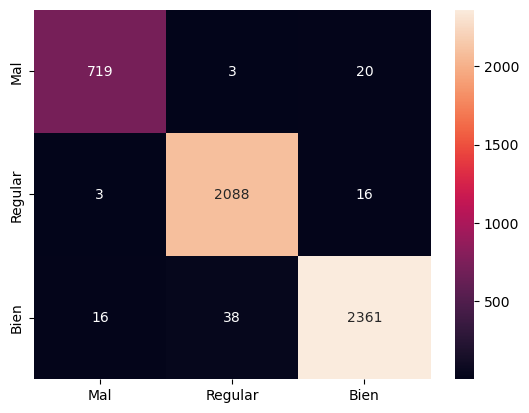

In [21]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 2 <font color='#EE8983 '>Aprendizaje Bayesiano</font>

El aprendizaje bayesiano es un enfoque de aprendizaje automático que utiliza la teoría de la probabilidad bayesiana para hacer inferencias sobre los datos. La teoría de la probabilidad bayesiana se basa en la idea de que la probabilidad de un evento depende de la información previa que se tiene sobre ese evento.

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


clf2 = GaussianNB()
clf2 = clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print("Gaussian Naive Bayes score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Gaussian Naive Bayes score: 0.612


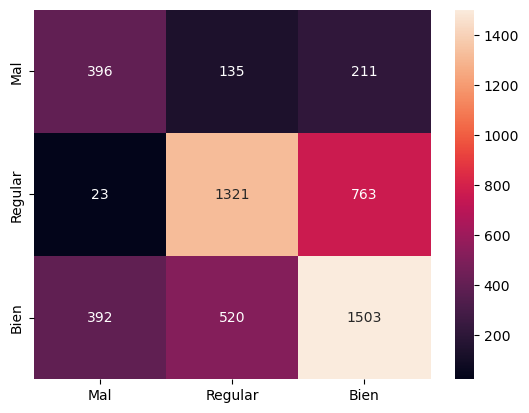

In [23]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 3  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.964


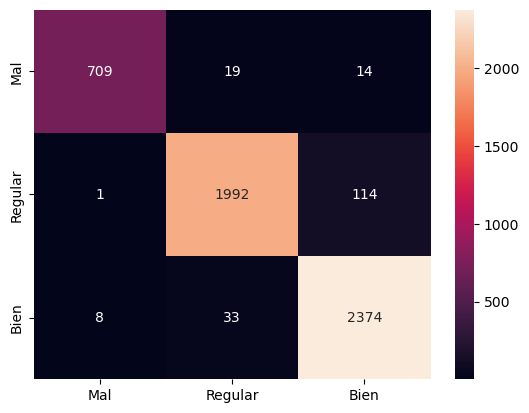

In [25]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 4 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [26]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.984


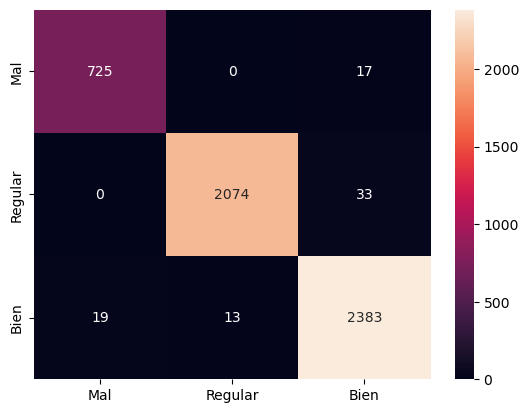

In [27]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 5 <font color='#DF5B91 '>AdaBoost</font>
AdaBoost funciona entrenando un conjunto de clasificadores débiles, cada uno de los cuales se enfoca en las observaciones que fueron mal clasificadas por los clasificadores anteriores. Los pesos de las observaciones se actualizan después de cada iteración para que los clasificadores futuros se centren en las observaciones que son más difíciles de clasificar.

In [28]:
from sklearn.ensemble import AdaBoostClassifier

clf6 = AdaBoostClassifier(random_state=42)
clf6 = clf6.fit(x_train, y_train)
y_pred = clf6.predict(x_test)
print("AdaBoost score: {:.3f}".format(accuracy_score(y_test, y_pred)))

AdaBoost score: 0.804


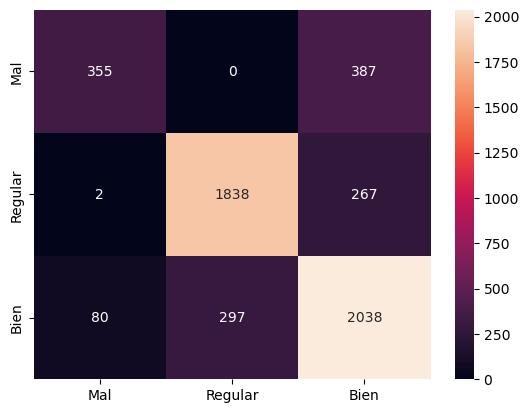

In [29]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 6 <font color='#5B6FDF '>Random Forest</font>


Random Forest es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Random Forest es un conjunto de árboles de decisión aleatorios.
Random Forest funciona construyendo un conjunto de árboles de decisión aleatorios. Cada árbol de decisión se construye sobre un subconjunto aleatorio de los datos de entrenamiento. Las observaciones que se utilizan para construir un árbol de decisión son seleccionadas al azar sin reemplazo.

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf7 = RandomForestClassifier()
clf7 = clf7.fit(x_train, y_train)
y_pred = clf7.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Random Forest score: 1.000


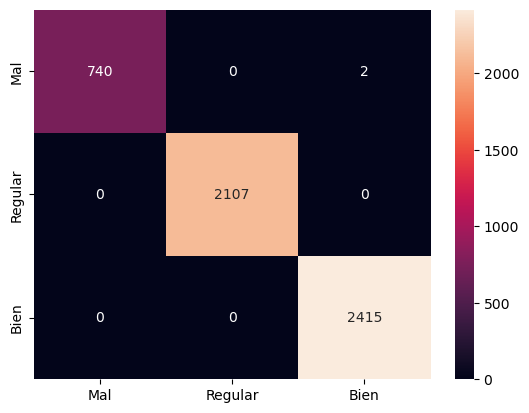

In [31]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

El clasificador Random Forest presenta un buen rendimiento general, con una alta precisión para las clases "Derecha", "Frente" e "Izquierda".
Se observa un número considerable de falsos positivos para la clase "Palanca", donde 15 casos fueron clasificados erróneamente como "Palanca" cuando en realidad eran "Frente".
La clase "Retrovisor" tiene la menor precisión, con 274 falsos negativos y 158 falsos positivos.

### 7 <font color='#5B6FDF '>QDA</font>

QDA, o Quadratic Discriminant Analysis, es un algoritmo de clasificación supervisado que se utiliza para clasificar las observaciones en diferentes categorías. QDA es un modelo probabilístico que se basa en la teoría de la probabilidad bayesiana.
QDA es un algoritmo robusto que es menos propenso al sobreajuste que otros algoritmos de clasificación. QDA también puede manejar datos complejos o no lineales.

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf8 = QuadraticDiscriminantAnalysis()
clf8 = clf8.fit(x_train, y_train)
y_pred = clf8.predict(x_test)
print("QDA score: {:.3f}".format(accuracy_score(y_test, y_pred)))

QDA score: 0.884


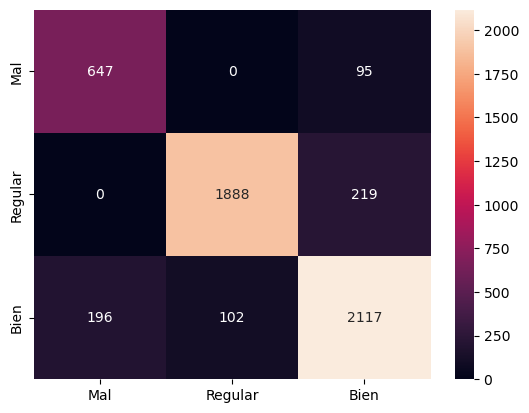

In [33]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

Una vez que se ejecutaron los siete clasificadores y teniendo los siguientes clasificadores con mejor desempeño: 
1. Árboles de decisión               0.984
2. Redes Neuronales                  0.984
3. Aprendizaje Basado en Instancias  0.964


Se procede a emplear solo estos clasificadores para el resto de los demás sensores

##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 2


Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X_s2, Y_s2, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10505, 21), (10505,), (3502, 21), (3502,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.997


Creamos la matriz de confusión 

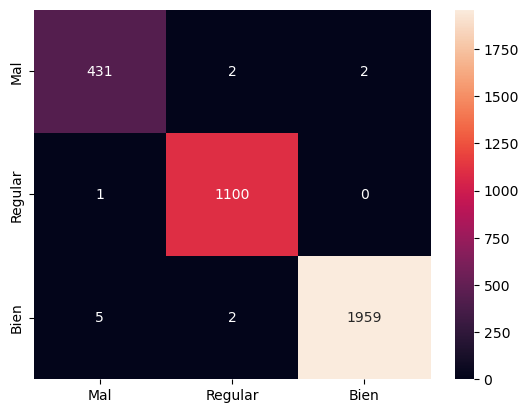

In [36]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 2  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.985


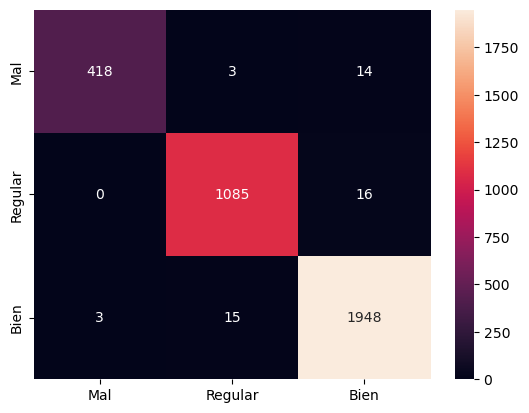

In [38]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 3 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [39]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.999


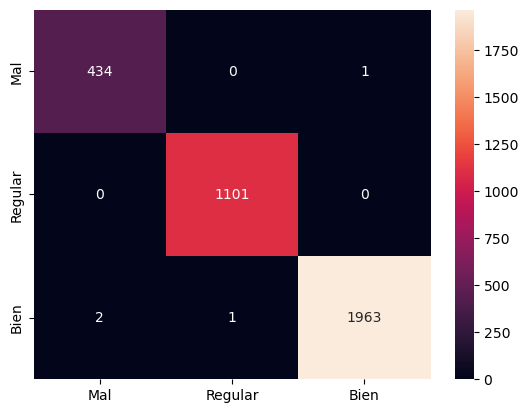

In [40]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 3


Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X_s3, Y_s3, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7316, 21), (7316,), (2439, 21), (2439,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.990


Creamos la matriz de confusión 

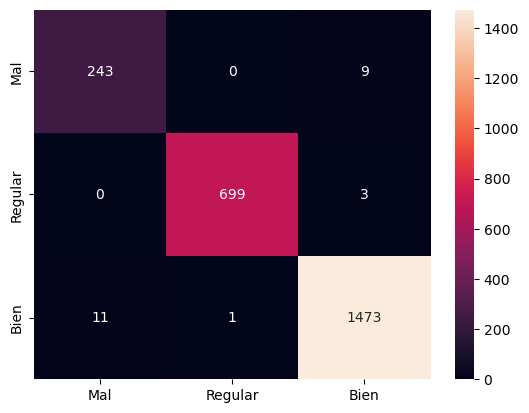

In [43]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 2  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.932


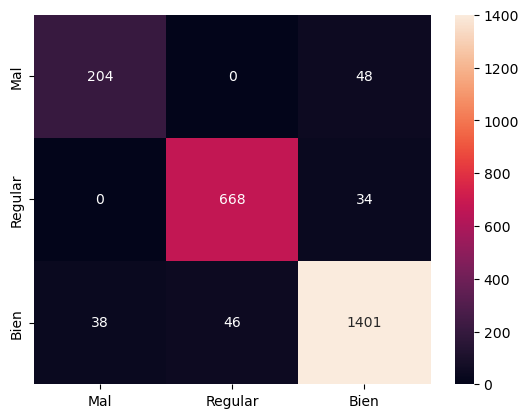

In [45]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 3 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [46]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.995


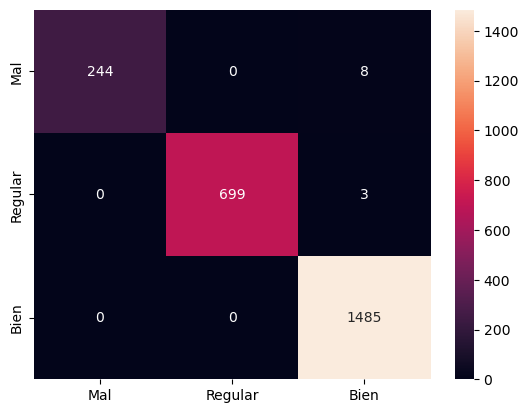

In [47]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 4


Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_s4, Y_s4, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10914, 21), (10914,), (3638, 21), (3638,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.998


Creamos la matriz de confusión 

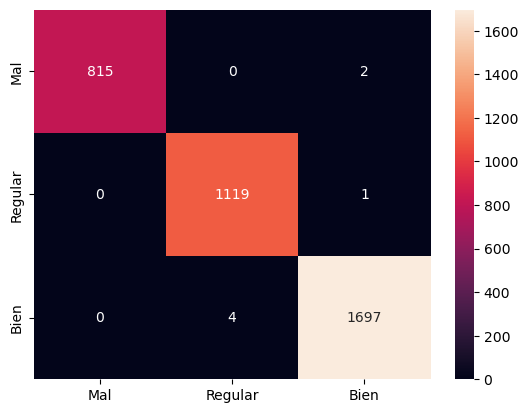

In [50]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 2  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.940


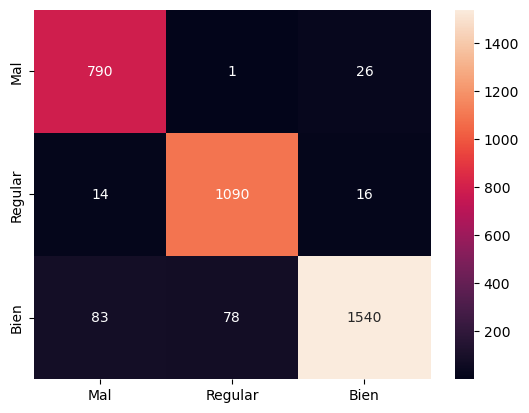

In [52]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 3 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [53]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.988


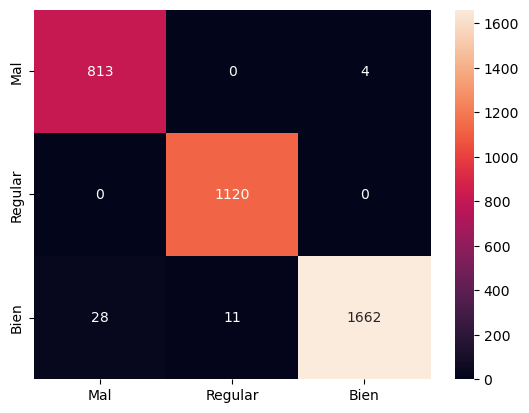

In [54]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 5


Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_s5, Y_s5, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4702, 21), (4702,), (1568, 21), (1568,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.996


Creamos la matriz de confusión 

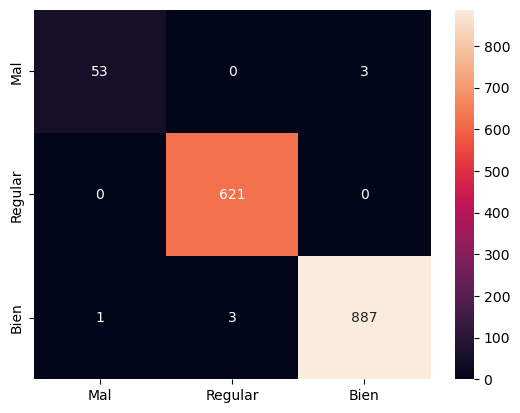

In [57]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 2  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test, y_pred)))

K-Nearest Neighbors score: 0.975


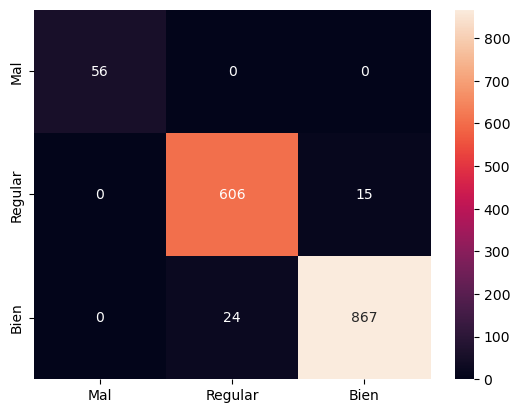

In [59]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

### 3 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [60]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train, y_train)
y_pred = clf5.predict(x_test)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Neural Network score: 0.992


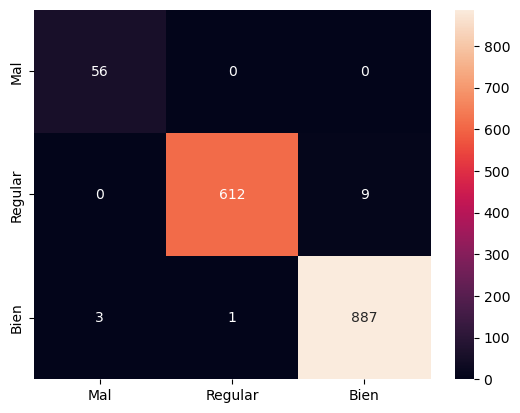

In [61]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["Mal", "Regular", "Bien"], yticklabels=["Mal", "Regular", "Bien"], fmt='.0f');

#  <font color='#F5BCA9 '>Validación   </font>  Externa<font color='#CD5C5C '>  </font> 


Para hacer la validación externa se empleo el archivo validacion.csv

Se realizó además la predicción para cada uno de los sensores empleando el mismo clasificador, el cual corresponde a "Árboles de desición"

In [62]:
test = pd.read_csv('Datas/validacion.csv')
test = test.drop([' Altitude (m)', ' HeaveMotion (m)', ' Pressure (kPa)', ' Temperature (degC)' ], axis=1)

##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 1


In [63]:
test1 = test[test['SensorId'] == 1]

test1 = test1.iloc[:,1:]

In [64]:
clft1 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clft1.fit(X_s1,Y_s1)

MLPClassifier(alpha=1, max_iter=1000, random_state=80)

In [65]:
pred1 = clft1.predict(test1)
print('La predicción de la sentadilla 1 es: ', np.round(np.mean(pred1[0:146])))
print('La predicción de la sentadilla 2 es: ', np.round(np.mean(pred1[147:294])))
print('La predicción de la sentadilla 3 es: ', np.round(np.mean(pred1[295:442])))
print('La predicción de la sentadilla 4 es: ', np.round(np.mean(pred1[443:588])))
print('La predicción de la sentadilla 5 es: ', np.round(np.mean(pred1[589:744])))

La predicción de la sentadilla 1 es:  0.0
La predicción de la sentadilla 2 es:  1.0
La predicción de la sentadilla 3 es:  1.0
La predicción de la sentadilla 4 es:  1.0
La predicción de la sentadilla 5 es:  1.0


##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 2


In [66]:
test2 = test[test['SensorId'] == 2]

test2 = test2.iloc[:,1:]

In [67]:
len(test2)

656

In [68]:
clft2 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clft2.fit(X_s2,Y_s2)

MLPClassifier(alpha=1, max_iter=1000, random_state=80)

In [69]:
pred2 = clft2.predict(test2)
print('La predicción de la sentadilla 1 es: ', np.round(np.mean(pred1[0:131])))
print('La predicción de la sentadilla 2 es: ', np.round(np.mean(pred1[131:263])))
print('La predicción de la sentadilla 3 es: ', np.round(np.mean(pred1[264:395])))
print('La predicción de la sentadilla 4 es: ', np.round(np.mean(pred1[396:527])))
print('La predicción de la sentadilla 5 es: ', np.round(np.mean(pred1[528:656])))

La predicción de la sentadilla 1 es:  0.0
La predicción de la sentadilla 2 es:  1.0
La predicción de la sentadilla 3 es:  1.0
La predicción de la sentadilla 4 es:  1.0
La predicción de la sentadilla 5 es:  1.0


##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 3


In [70]:
test3 = test[test['SensorId'] == 3]

test3 = test3.iloc[:,1:]

In [71]:
len(test3)

644

In [72]:
clft3 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clft3.fit(X_s3,Y_s3)

MLPClassifier(alpha=1, max_iter=1000, random_state=80)

In [73]:
pred3 = clft3.predict(test3)
print('La predicción de la sentadilla 1 es: ', np.round(np.mean(pred1[0:128])))
print('La predicción de la sentadilla 2 es: ', np.round(np.mean(pred1[129:257])))
print('La predicción de la sentadilla 3 es: ', np.round(np.mean(pred1[258:386])))
print('La predicción de la sentadilla 4 es: ', np.round(np.mean(pred1[387:515])))
print('La predicción de la sentadilla 5 es: ', np.round(np.mean(pred1[516:644])))

La predicción de la sentadilla 1 es:  0.0
La predicción de la sentadilla 2 es:  1.0
La predicción de la sentadilla 3 es:  1.0
La predicción de la sentadilla 4 es:  1.0
La predicción de la sentadilla 5 es:  1.0


##  <font color='#F5BCA9 '>   </font>  <font color='#CD5C5C '> Sensor </font> 4


In [74]:
test4 = test[test['SensorId'] == 4]

test4 = test4.iloc[:,1:]

In [75]:
len(test4)

516

In [76]:
clft4 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clft4.fit(X_s4,Y_s4)

MLPClassifier(alpha=1, max_iter=1000, random_state=80)

In [77]:
pred4 = clft4.predict(test4)
print('La predicción de la sentadilla 1 es: ', np.round(np.mean(pred1[0:103])))
print('La predicción de la sentadilla 2 es: ', np.round(np.mean(pred1[104:207])))
print('La predicción de la sentadilla 3 es: ', np.round(np.mean(pred1[208:311])))
print('La predicción de la sentadilla 4 es: ', np.round(np.mean(pred1[312:415])))
print('La predicción de la sentadilla 5 es: ', np.round(np.mean(pred1[415:516])))

La predicción de la sentadilla 1 es:  0.0
La predicción de la sentadilla 2 es:  0.0
La predicción de la sentadilla 3 es:  1.0
La predicción de la sentadilla 4 es:  1.0
La predicción de la sentadilla 5 es:  1.0


##  <font color='#EFC9AF '>   Resultados </font> Predicciones <font color='#CD5C5C '>  </font> 


A continuación se muestra una tabla donde se presentan todas las prediciones para cada una de las 5 repeticiones y además para cada uno de los 5 sensores, aunque cabe mencionar que en el archivo proporcionado para la validación externa no se proporcionó datos referentes al sesnor 5, por lo que únicamente se estaran mostrando los resultados para los 4 sensores. 


|Repetición |Sensor 1| Sensor 2 | Sensor 3 | Sensor 4 | Final |
|-----------|--------|----------|---------|-----------|-------|
| 1 | 0 | 0 | 0 | 0 | Mal | 
| 2 | 1 | 1 | 1 | 0 | Regular |
| 3 | 1 | 1 | 1 | 1 | Regular |
| 4 | 1 | 1 | 1 | 1 | Regular |
| 5 | 1 | 1 | 1 | 1 | Regular |

Podemos observar que en consenso se muestra que solo la primer sentadilla la realizó incorrectamente, miestras que las 4 sentadillas restantes de acuerdo a la escala proporcinada se puede decir que las sentadillas las realizó de manera regular, esto es qe no se realizarón del todo mal, pero tampoco del todo bien, que pueden mejorar.

#  <font color='#F5BCA9 '>Validación   </font>  Externa<font color='#CD5C5C '> pt 2 </font> 


Se vuelven a leer los archivos para evitar probelas de sobreescritura o demás.

In [78]:
df1 = pd.read_csv("Datas/Andrea.csv")
df2 = pd.read_csv("Datas/Andres.csv")
df3 = pd.read_csv("Datas/Ariana.csv")
df4 = pd.read_csv("Datas/Arturo.csv")
df5 = pd.read_csv("Datas/Cristian.csv")
df6 = pd.read_csv("Datas/Juan.csv")
df7 = pd.read_csv("Datas/Leydy.csv")
df8 = pd.read_csv("Datas/Rachel.csv")
df9 = pd.read_csv("Datas/Scarlett.csv")
df10 = pd.read_csv("Datas/testing.csv")
df11 = pd.read_csv("Datas/validacion.csv")

Se ha decidido trabajar con el sensor 1. Así que aquí se obtienen para cada archivo el dataframe correspondiente con el sensor 1 

In [79]:
dfs2_1 = df1[df1['SensorId']==1]
dfs2_2 = df2[df2['SensorId']==1]
dfs2_3 = df3[df3['SensorId']==1]
dfs2_4 = df4[df4['SensorId']==1]
dfs2_5 = df5[df5['SensorId']==1]
dfs2_6 = df6[df6['SensorId']==1]
dfs2_7 = df7[df7['SensorId']==1]
dfs2_8 = df8[df8['SensorId']==1]
dfs2_9 = df9[df9['SensorId']==1]
dfs2_10 = df10[df10['SensorId']==1]
dfs2_11 = df11[df11['SensorId']==1]

Obtenemos los vectores de tiempo para cada uno de los diferentes sujetos de prueba 

In [80]:
#Vector del tiempo
x1 = dfs2_1[' TimeStamp (s)']
x2 = dfs2_2[' TimeStamp (s)']
x3 = dfs2_3[' TimeStamp (s)']
x4 = dfs2_4[' TimeStamp (s)']
x5 = dfs2_5[' TimeStamp (s)']
x6 = dfs2_6[' TimeStamp (s)']
x7 = dfs2_7[' TimeStamp (s)']
x8 = dfs2_8[' TimeStamp (s)']
x9 = dfs2_9[' TimeStamp (s)']
x10 = dfs2_10[' TimeStamp (s)']
x11 = dfs2_11[' TimeStamp (s)']

Obtenemos la Feature "" de todos los sujetos 

In [81]:
#Feature Quat en W
y1 = dfs2_1[' QuatW']
y2 = dfs2_2[' QuatW']
y3 = dfs2_3[' QuatW']
y4 = dfs2_4[' QuatW']
y5 = dfs2_5[' QuatW']
y6 = dfs2_6[' QuatW']
y7 = dfs2_7[' QuatW']
y8 = dfs2_8[' QuatW']
y9 = dfs2_9[' QuatW']
y10 = dfs2_10[' QuatW']
y11 = dfs2_11[' QuatW']

##  <font color='#F5BCA9 '>Evaluación   </font>  Andrea<font color='#CD5C5C '>  </font> 


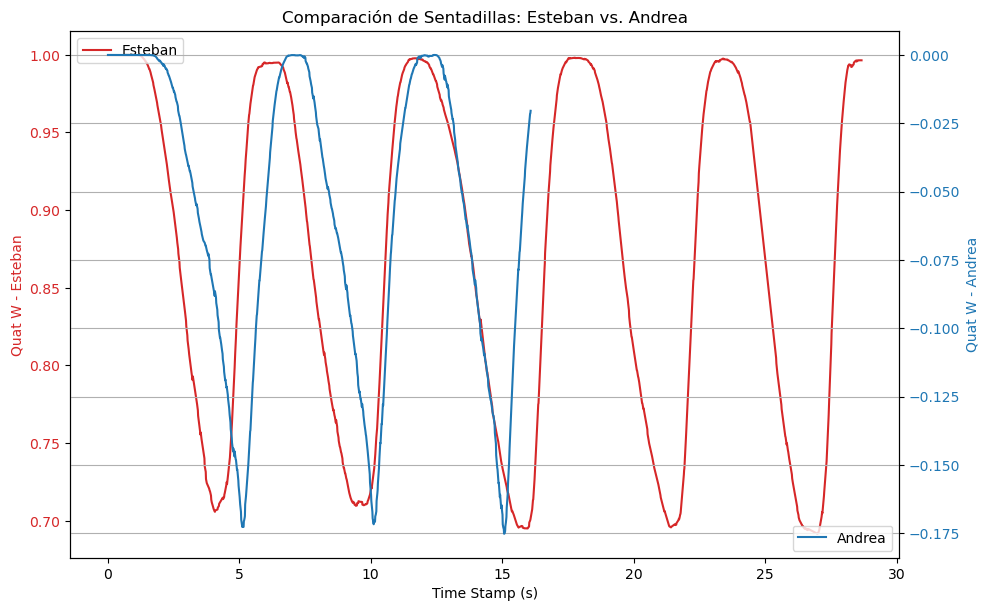

In [82]:
# Convertir a numpy array si x1 y y1 son series de pandas
if isinstance(x1, pd.Series):
    x1 = x1.to_numpy()
if isinstance(y1, pd.Series):
    y1 = y1.to_numpy()

# Ajustes iniciales
x1_ajustado = x1[200:] - x1[200]  
y1_ajustado = y1[200:] - y1[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Andrea
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Andrea', color=color)
ax2.plot(x1_ajustado, y1_ajustado, color=color, label ='Andrea')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Andrea
ax2.legend(loc='lower right')


fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Andrea')
plt.grid(True)
plt.show()

Consistencia: Las sentadillas de Andrea varían en amplitud, lo que podría indicar una falta de consistencia en la profundidad de las sentadillas.

Profundidad: Parece que Andrea no alcanza la misma profundidad que Esteban en algunas de las repeticiones, lo que podría reducir la calificación.

Simetría/Forma: La línea azul tiene picos y valles abruptos en comparación con la línea roja, sugiriendo que el control y la técnica de Andrea pueden no ser tan buenos como los de Esteban.

Tiempo entre Repeticiones: Hay variabilidad en el tiempo entre las sentadillas de Andrea, lo que podría indicar inconsistencia en el ritmo.

##  <font color='#F5BCA9 '>Evaluación   </font>  Andres<font color='#CD5C5C '>  </font> 


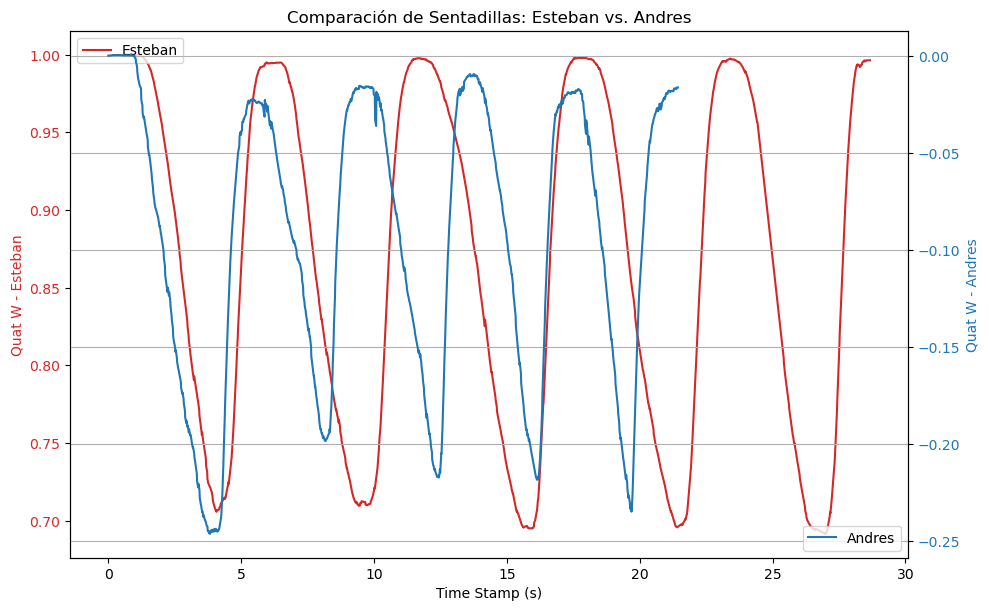

In [83]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x2, pd.Series):
    x2 = x2.to_numpy()
if isinstance(y2, pd.Series):
    y2 = y2.to_numpy()

# Ajustes iniciales
x2_ajustado = x2[200:] - x2[200]  
y2_ajustado = y2[200:] - y2[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Andres
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Andres', color=color)
ax2.plot(x2_ajustado, y2_ajustado, color=color, label ='Andres')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Andres
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Andres')
plt.grid(True)
plt.show()

Consistencia: La línea azul muestra variabilidad en la amplitud y la forma de las ondas, lo que indica que hay diferencias en la forma en que Andres realiza cada sentadilla.

Profundidad de la Sentadilla: Comparando con las de Esteban, parece que Andres no alcanza la misma profundidad consistentemente en sus sentadillas, lo que se ve en la menor amplitud de algunas de las ondas azules.

Simetría y Forma de la Curva: La línea azul tiene ondas con picos menos simétricos y algunas irregularidades en comparación con la línea roja, lo que sugiere que la técnica de Andres podría mejorar en términos de control y uniformidad.

Tiempo entre Repeticiones: Las sentadillas de Andres no son tan uniformes en el tiempo como las de Esteban. Esto se puede ver en el eje x, donde las ondas azules no están tan equidistantes como las rojas.

##  <font color='#F5BCA9 '>Evaluación   </font>  Ariana<font color='#CD5C5C '>  </font> 


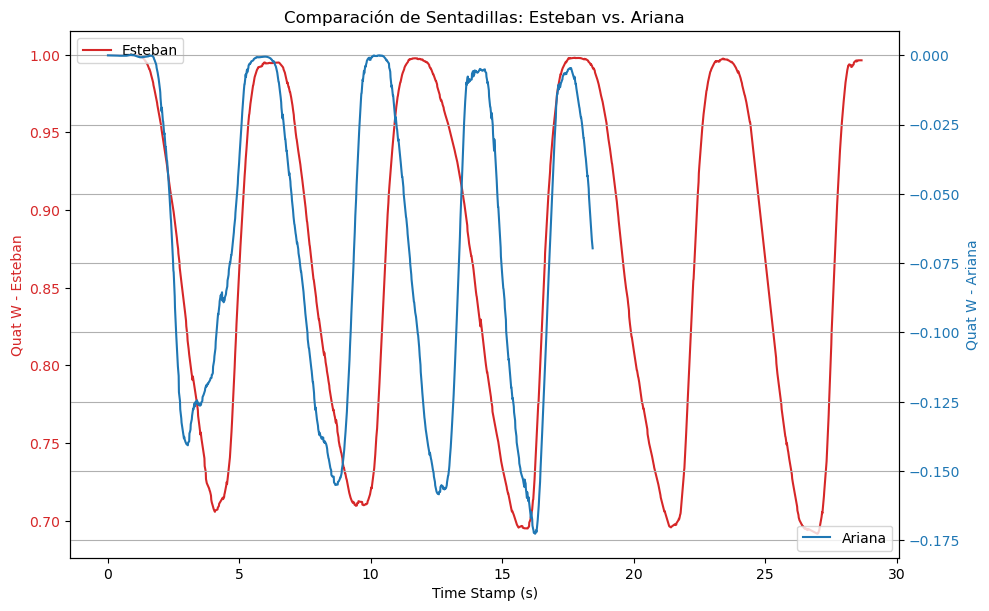

In [84]:

if isinstance(x3, pd.Series):
    x3 = x3.to_numpy()
if isinstance(y3, pd.Series):
    y3 = y3.to_numpy()

# Ajustes iniciales
x3_ajustado = x3[200:] - x3[200]  
y3_ajustado = y3[200:] - y3[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Ariana
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Ariana', color=color)
ax2.plot(x3_ajustado, y3_ajustado, color=color, label ='Ariana')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Ariana
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Ariana')
plt.grid(True)
plt.show()

Consistencia: Las ondas correspondientes a Ariana son bastante consistentes en amplitud y forma, lo que sugiere una buena consistencia en la profundidad de cada sentadilla.

Profundidad de la Sentadilla: Las ondas azules alcanzan casi la misma profundidad que las ondas rojas, lo que indica que Ariana está logrando una profundidad similar a la de Esteban, aunque con ligeras variaciones.

Simetría y Forma de la Curva: Aunque hay ligeras diferencias, las ondas azules mantienen una simetría razonable y se asemejan en gran medida a las ondas de Esteban. Esto podría indicar que la técnica de Ariana es bastante buena.

Tiempo entre Repeticiones: El espaciamiento entre las ondas azules parece regular y similar al de Esteban, lo que sugiere que Ariana mantiene un ritmo consistente durante las repeticiones.

##  <font color='#F5BCA9 '>Evaluación   </font>  Arturo<font color='#CD5C5C '>  </font> 


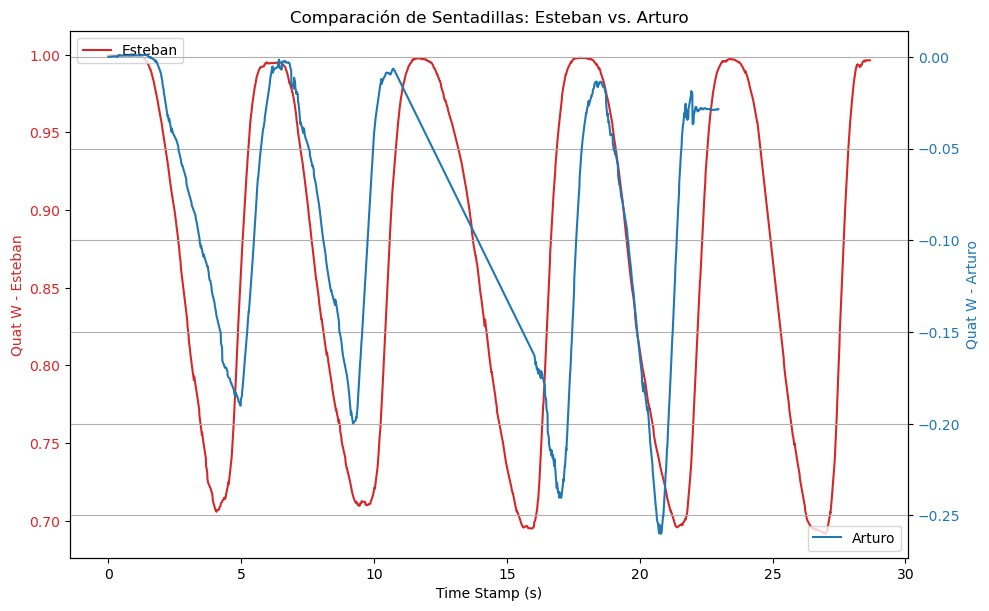

In [85]:

if isinstance(x4, pd.Series):
    x4 = x4.to_numpy()
if isinstance(y4, pd.Series):
    y4 = y4.to_numpy()

# Ajustes iniciales
x4_ajustado = x4[200:] - x4[200]  
y4_ajustado = y4[200:] - y4[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Arturo
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Arturo', color=color)
ax2.plot(x4_ajustado, y4_ajustado, color=color, label ='Arturo')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Arturo
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Arturo')
plt.grid(True)
plt.show()

Consistencia: Hay una variabilidad notable en la amplitud de las ondas de Arturo, lo que indica inconsistencias en la profundidad de sus sentadillas.

Profundidad de la Sentadilla: Algunas de las ondas azules no descienden tanto como las rojas, lo que sugiere que Arturo no siempre alcanza la profundidad adecuada.

Simetría y Forma de la Curva: Las ondas de Arturo son menos simétricas y muestran irregularidades significativas, particularmente en las cimas y los valles de las ondas. Esto puede ser indicativo de una técnica inestable y un control muscular irregular.

Tiempo entre Repeticiones: Hay una discrepancia en el espaciamiento entre las ondas azules, lo que señala una falta de ritmo constante en las repeticiones de Arturo.

##  <font color='#F5BCA9 '>Evaluación   </font>  Cristian<font color='#CD5C5C '>  </font> 


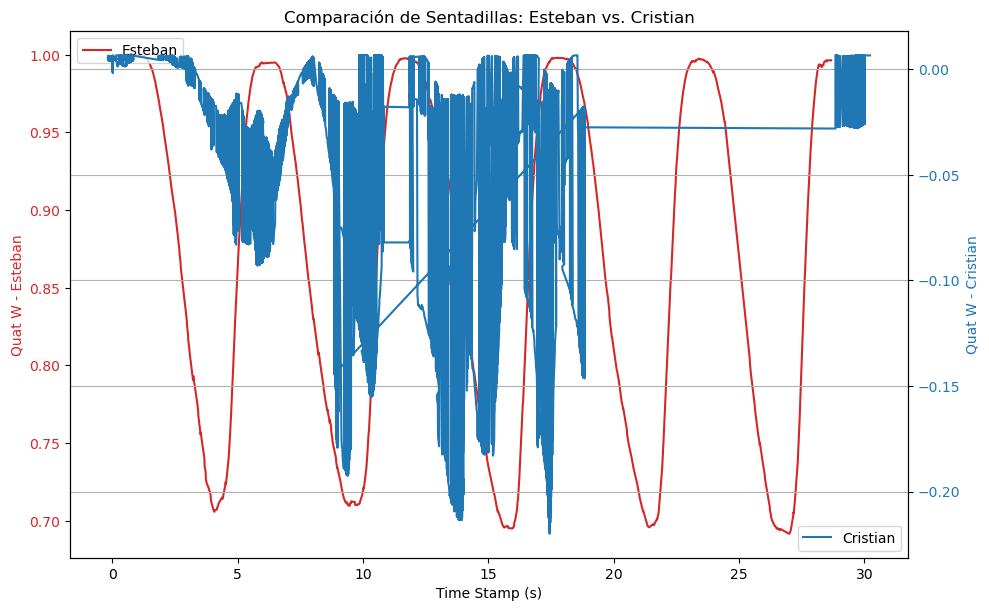

In [86]:

if isinstance(x5, pd.Series):
    x5 = x5.to_numpy()
if isinstance(y5, pd.Series):
    y5 = y5.to_numpy()

# Ajustes iniciales
x5_ajustado = x5[200:] - x5[200]  
y5_ajustado = y5[200:] - y5[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Cristian
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Cristian', color=color)
ax2.plot(x5_ajustado, y5_ajustado, color=color, label ='Cristian')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Cristian
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Cristian')
plt.grid(True)
plt.show()

Evidentemente hubo un error al momento de sensar los datos y la adquisición no fue la correcta 

##  <font color='#F5BCA9 '>Evaluación   </font>  Juan<font color='#CD5C5C '>  </font> 


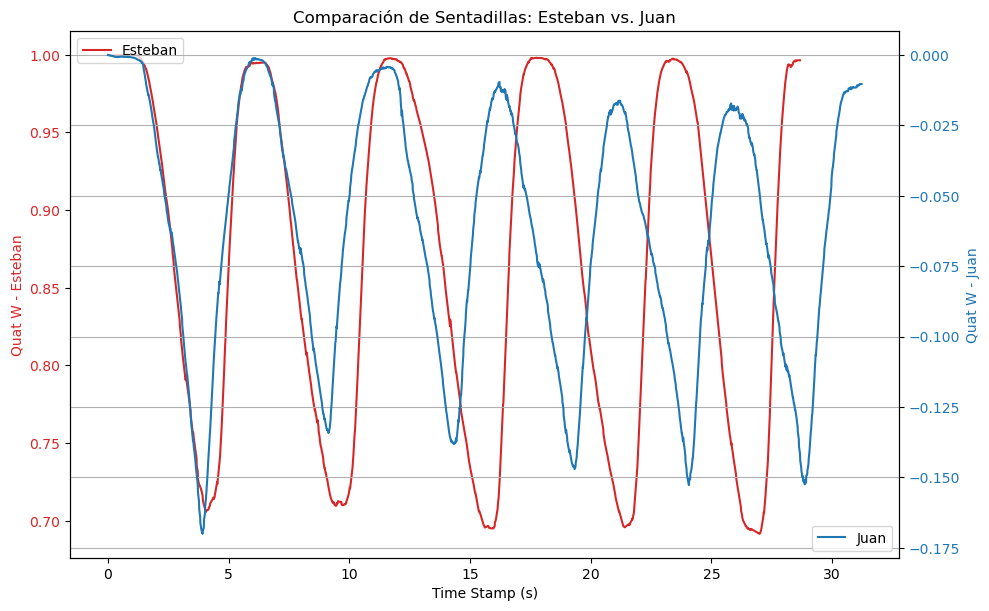

In [87]:

if isinstance(x6, pd.Series):
    x6 = x6.to_numpy()
if isinstance(y6, pd.Series):
    y6 = y6.to_numpy()

# Ajustes iniciales
x6_ajustado = x6[200:] - x6[200]  
y6_ajustado = y6[200:] - y6[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Juan
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Juan', color=color)
ax2.plot(x6_ajustado, y6_ajustado, color=color, label ='Juan')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Juan
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Juan')
plt.grid(True)
plt.show()

Forma de la Curva: Una sentadilla perfecta tendría un patrón de movimiento suave y consistente, lo que se traduciría en una curva regular y predecible como la que vemos en rojo. La línea azul debe seguir esta forma de manera similar para obtener una alta puntuación.

Amplitud de la Curva: Esto representa la profundidad y el rango completo de movimiento de las sentadillas. La línea azul debería tener una amplitud similar a la roja, llegando a los mismos valores máximos y mínimos si las sentadillas son completas.

Consistencia entre Repeticiones: En la línea roja, cada ciclo (que representa una sentadilla) parece ser muy similar al anterior. Esto indica una ejecución consistente. La línea azul debería mostrar la misma consistencia para ser calificada como excelente.

Tiempo de repeticiones: En la línea roja, se puede notar que el inicio y el final de cada sentadilla se sitúan en el mismo nivel, lo que indica una posición inicial y final consistente. La línea azul debería mostrar un patrón similar.

##  <font color='#F5BCA9 '>Evaluación   </font>  Leydy<font color='#CD5C5C '>  </font> 


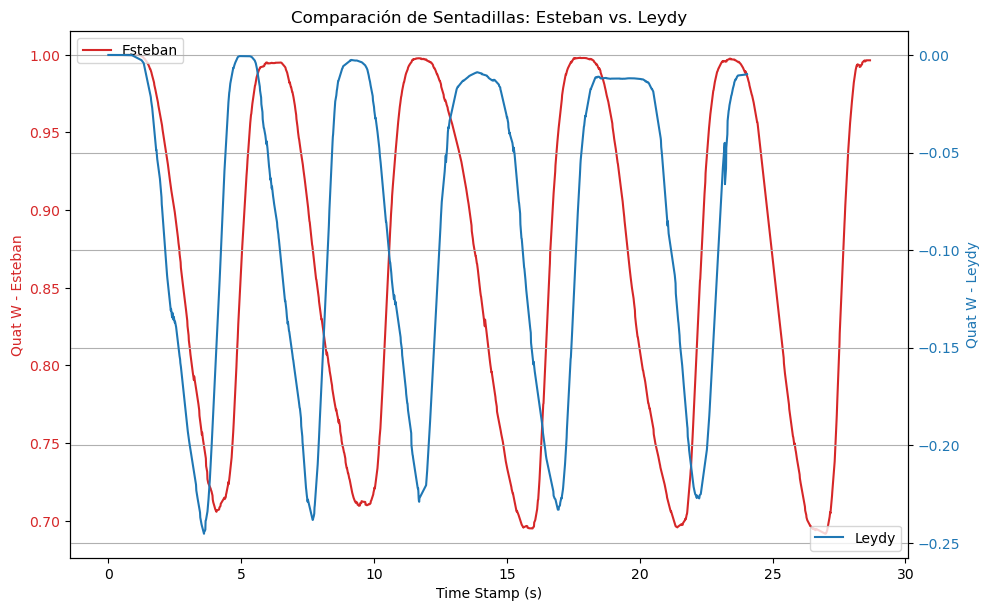

In [88]:

if isinstance(x7, pd.Series):
    x7 = x7.to_numpy()
if isinstance(y7, pd.Series):
    y7 = y7.to_numpy()

# Ajustes iniciales
x7_ajustado = x7[200:] - x7[200]  
y7_ajustado = y7[200:] - y7[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Leydy
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Leydy', color=color)
ax2.plot(x7_ajustado, y7_ajustado, color=color, label ='Leydy')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Leydy
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Leydy')
plt.grid(True)
plt.show()

Forma de la Curva: La curva de Leydy sigue la misma forma general que la de Esteban por lo que se considerae una sentadilla bien ejecutada.

Amplitud de la Curva: La profundidad y el rango completo de movimiento de las sentadillas de Leydy son similares a los de Esteban. Si las curvas alcanzan los mismos picos y valles, indica que Leydy está realizando sentadillas con una profundidad similar.

Consistencia entre Repeticiones: Cada ciclo de la curva de Leydy  son consistentes en forma y amplitud con los demás ciclos, así como con los de Esteban.

Inicio y Final de Cada Sentadilla: Leydy comienza y termina cada sentadilla en el mismo nivel y se considera un movimiento consistente.

Observando la gráfica, se puede ver que la línea azul sigue una forma similar a la línea roja pero con algunas diferencias notables:

Hay una variación en la profundidad de las sentadillas, como se puede ver en la amplitud de la curva azul que es ligeramente diferente a la roja en algunos puntos.
La línea azul parece tener un pequeño retraso o desfase respecto a la línea roja en algunos ciclos, lo que podría indicar una ligera diferencia en el ritmo o la velocidad de las sentadillas.

##  <font color='#F5BCA9 '>Evaluación   </font>  Rachel<font color='#CD5C5C '>  </font> 


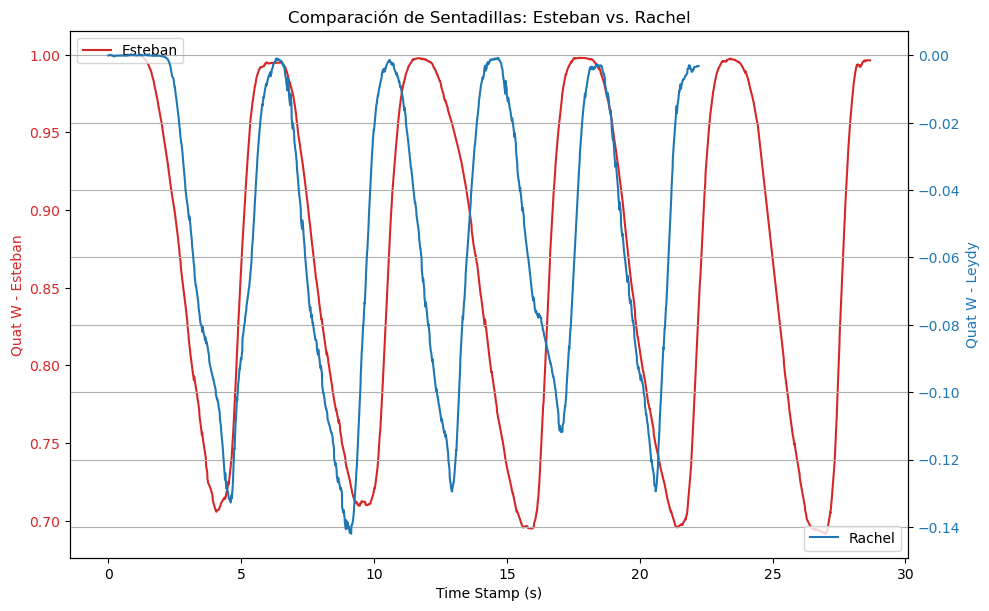

In [89]:

if isinstance(x8, pd.Series):
    x8 = x8.to_numpy()
if isinstance(y8, pd.Series):
    y8 = y8.to_numpy()

# Ajustes iniciales
x8_ajustado = x8[200:] - x8[200]  
y8_ajustado = y8[200:] - y8[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Rachel
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Leydy', color=color)
ax2.plot(x8_ajustado, y8_ajustado, color=color, label ='Rachel')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Rachel
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Rachel')
plt.grid(True)
plt.show()

La curva azul (Rachel) sigue la misma tendencia general que la curva roja (Esteban), lo cual es bueno.
Hay una ligera diferencia en la profundidad de las sentadillas, como se ve en la amplitud de la curva azul que no siempre coincide con la roja.
La consistencia de Rachel parece buena ya que la forma de la curva se mantiene constante a lo largo de las repeticiones.
La sincronización y la velocidad de las sentadillas de Rachel parecen coincidir bastante bien con las de Esteban, aunque hay ligeras variaciones en algunos puntos.

##  <font color='#F5BCA9 '>Evaluación   </font> Scarlett<font color='#CD5C5C '>  </font> 


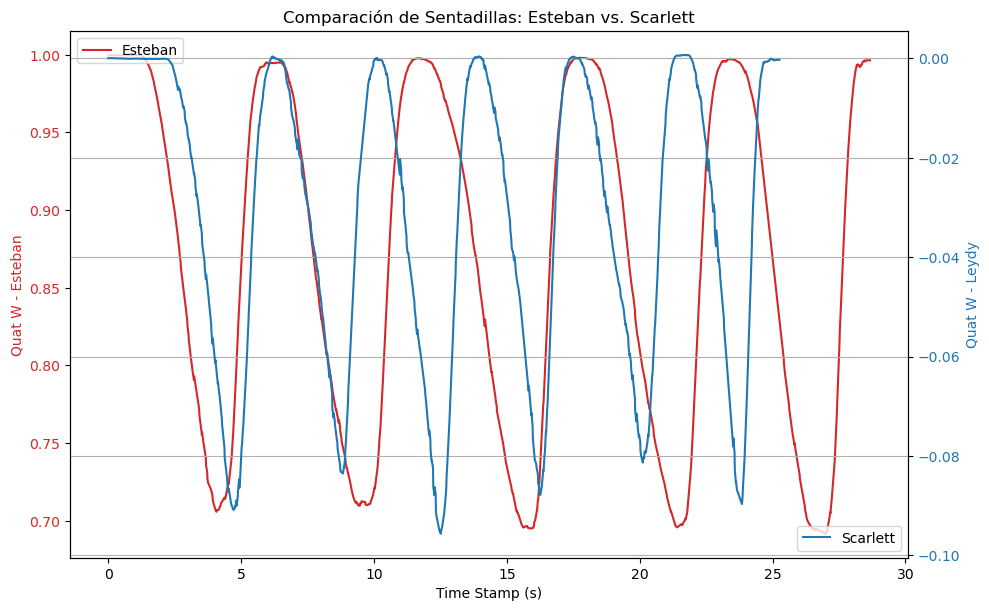

In [90]:

if isinstance(x9, pd.Series):
    x9 = x9.to_numpy()
if isinstance(y9, pd.Series):
    y9 = y9.to_numpy()

# Ajustes iniciales
x9_ajustado = x9[200:] - x9[200]  
y9_ajustado = y9[200:] - y9[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# Scarlett
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - Leydy', color=color)
ax2.plot(x9_ajustado, y9_ajustado, color=color, label ='Scarlett')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Scarlett
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Scarlett')
plt.grid(True)
plt.show()

Forma de la Curva: Scarlett parece seguir la forma de la curva de Esteban bastante bien, aunque con algunas variaciones en la altura de las repeticiones.

Amplitud de la Curva: La amplitud de las curvas representa la profundidad de las sentadillas. En algunos puntos, la curva de Scarlett no llega tan bajo como la de Esteban, lo que podría indicar que no está alcanzando la misma profundidad en cada sentadilla.

Consistencia de las Repeticiones: Las repeticiones de Scarlett son consistentes en forma, aunque no siempre coinciden con la profundidad de las sentadillas de Esteban.

Inicio y Final de Cada Sentadilla: La sincronización del inicio y el final de las sentadillas entre Scarlett y Esteban parece ser buena, aunque Scarlett comienza algunas sentadillas antes y termina otras después que Esteban.

#  <font color='red'>Evaluación   </font> Validación<font color='red'>  </font> 


In [92]:
dfs2_10 = df10[df10['SensorId']==1]
dfs2_11 = df11[df11['SensorId']==1]
x10 = dfs2_10[' TimeStamp (s)']
x11 = dfs2_11[' TimeStamp (s)']
y10 = dfs2_10[' EulerX (deg)']
y11 = dfs2_11[' EulerX (deg)']

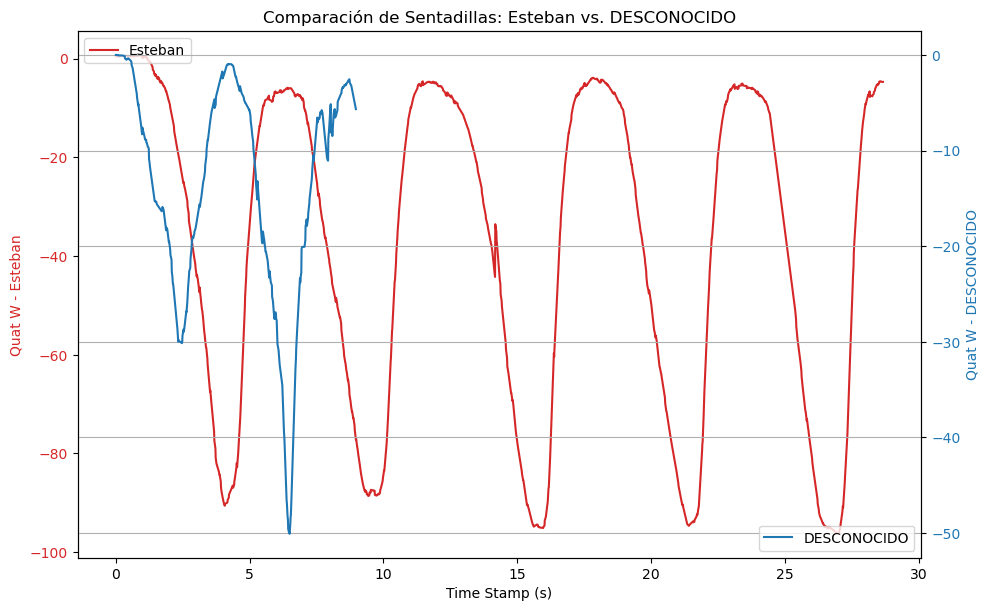

In [93]:

if isinstance(x11, pd.Series):
    x11 = x11.to_numpy()
if isinstance(y11, pd.Series):
    y11 = y11.to_numpy()


# Ajustes iniciales
x11_ajustado = x11[200:] - x11[200]  
y11_ajustado = y11[200:] - y11[200] 

fig, ax1 = plt.subplots(figsize=(10, 6))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('Quat W - Esteban', color=color)
ax1.plot(x10, y10, color=color, label='Esteban')
ax1.tick_params(axis='y', labelcolor=color)

# DESCONOCIDO
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Quat W - DESCONOCIDO', color=color)
ax2.plot(x11_ajustado, y11_ajustado, color=color, label ='DESCONOCIDO')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de DESCONOCIDO
ax2.legend(loc='lower right')

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. DESCONOCIDO')
plt.grid(True)
plt.show()

Diferencias en Profundidad: La curva que representa a la persona desconocida tiene una amplitud mucho mayor que la de Esteban, lo que sugiere que está alcanzando una profundidad significativamente mayor en sus sentadillas.

Consistencia y Forma de la Curva: La curva de la persona desconocida parece ser menos consistente que la de Esteban, con variaciones notables en la amplitud de las repeticiones, lo que puede indicar una falta de uniformidad en su técnica.

Repeticiones Realizadas: Contando los picos de las curvas, parece que se han realizado un total de solo tres repeticiones. Lo que indica que el sujeto que realizó estas ejecuciones no completo las 5 sentadillas que eran requeridas.

Sincronización de las Repeticiones: No hay una sincronización perfecta entre Esteban y la persona desconocida, como se puede ver en los desfases de las curvas en varios puntos.

Puntuación sentadilla 1: 1 
Puntuación sentadilla 1: 1 
Puntuación sentadilla 1: 0 
Puntuación sentadilla 1: No realizó 
Puntuación sentadilla 1: No realizó
